# 2.3 Linear Algebra

In [1]:
import torch

In [2]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])

In [3]:
x + y

tensor([ 3.,  4.,  6., 10.])

In [4]:
# exponentition per element
x ** y

tensor([ 1.,  4., 16., 64.])

In [5]:
torch.exp(x)

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [6]:
# tensor concat by row and column
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2., 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((x, y), dim=0), torch.cat((x, y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [7]:
# in-place memory
z = torch.zeros_like(y)
print("id(z) = {}".format(id(z)))
z[:] = x + y
print("id(z) = {}".format(id(z)))

id(z) = 140103345689984
id(z) = 140103345689984


In [8]:
before = id(x)
x += y
id(x) == before

True

In [9]:
x.shape

torch.Size([3, 4])

In [10]:
x.T.shape

torch.Size([4, 3])

In [11]:
B = x.clone()

In [12]:
x

tensor([[ 2.,  2.,  6.,  6.],
        [ 5.,  7.,  9., 11.],
        [12., 12., 12., 12.]])

In [13]:
x.sum(axis=0)

tensor([19., 21., 27., 29.])

In [14]:
x.sum(axis=1)

tensor([16., 32., 48.])

In [15]:
x = torch.arange(0, 4.)
y = torch.ones(4, dtype=torch.float32)
x, y, torch.dot(x, y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [16]:
A = torch.ones(3, 4)
B = torch.ones(4, 3)
torch.mm(A, B)

tensor([[4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]])

# 2.4 Calculus

# 18.1 Geometry and Linear Algebraic Operations
Reference:
* https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/geometry-linear-algebraic-ops.html
* https://colab.research.google.com/github/d2l-ai/d2l-pytorch-colab/blob/master/chapter_appendix-mathematics-for-deep-learning/geometry-linear-algebraic-ops.ipynb
* copy d2l from https://github.com/d2l-ai/d2l-en/tree/master/d2l

In [17]:
%matplotlib inline
import torch
import torchvision
from IPython import display
from torchvision import transforms
from d2l import torch as d2l

def angle(v, w):
    return torch.acos(v.dot(w) / (torch.norm(v) * torch.norm(w)))

angle(torch.tensor([0, 1, 2], dtype=torch.float32), torch.tensor([2.0, 3, 4]))

tensor(0.4190)

In [18]:
# hyperplanes in any dimension separate the space into two halves
trans = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)
train = torchvision.datasets.FashionMNIST(root="../data", transform=trans, train=True, download=True)
test = torchvision.datasets.FashionMNIST(root="../data", transform=trans, train=False, download=True)
# class 1: t-shirt
X_train_0 = torch.stack([x[0] * 256 for x in train if x[1] == 0]).type(torch.float32)
# class 2: trouser
X_train_1 = torch.stack([x[0] * 256 for x in train if x[1] == 1]).type(torch.float32)
X_test = torch.stack([x[0] * 256 for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)
y_test = torch.stack([torch.tensor(x[1]) for x in test if x[1] == 0 or x[1] == 1]).type(torch.float32)

# compute averages 
# calculate hyperplances by just taking the vector between their means 
# to define the decision plane and eyeball a crude threshold
ave_0 = torch.mean(X_train_0, axis=0)
ave_1 = torch.mean(X_train_1, axis=0)

/home/administrator/miniconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


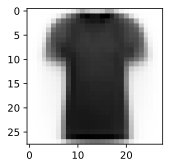

In [19]:
# Plot average t-shirt
d2l.set_figsize()
d2l.plt.imshow(ave_0.reshape(28,28).tolist(), cmap="Greys")
d2l.plt.show()

In [20]:
# Print test set accuracy with eyeballed threshold
w = (ave_1 - ave_0).T
# '@' is Matrix Multiplication operator in pytorch.
predictions = X_test.reshape(2000, -1) @ (w.flatten()) > -1500000

# Accuracy
torch.mean(predictions.type(y_test.dtype) == y_test, dtype=torch.float64)

tensor(0.7870, dtype=torch.float64)

In [21]:
M = torch.tensor([[1, 2], [1, 4]], dtype=torch.float32)
M_inv = torch.tensor([[2, -1], [-0.5, 0.5]])
M_inv @ M

tensor([[1., 0.],
        [0., 1.]])

In [22]:
torch.det(torch.tensor([[1, -1], [2, 3]], dtype=torch.float32))

tensor(5.)

In [23]:
# Define tensors
B = torch.tensor([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
A = torch.tensor([[1, 2], [3, 4]])
v = torch.tensor([1, 2])

# Print out the shapes
A.shape, B.shape, v.shape

(torch.Size([2, 2]), torch.Size([2, 2, 3]), torch.Size([2]))

In [24]:
# Reimplement matrix multiplication
torch.einsum("ij, j -> i", A, v), A@v

(tensor([ 5, 11]), tensor([ 5, 11]))

In [25]:
# Implementation for equivalent r
r = torch.zeros(v.shape)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        r[i]+=(A[i,j] * v[j])
r

tensor([ 5., 11.])

In [26]:
torch.einsum("ijk, il, j -> kl", B, A, v)

tensor([[ 90, 126],
        [102, 144],
        [114, 162]])

In [27]:
# Implementation for equivalent s
s = torch.zeros((B.shape[2], A.shape[1]))
for k in range(B.shape[2]):
    for l in range(A.shape[1]):
        for i in range(A.shape[0]):
            for j in range(v.shape[0]):
                s[k,l] += B[i,j,k] * A[i,l] * v[j]
s

tensor([[ 90., 126.],
        [102., 144.],
        [114., 162.]])

## Exercise for 18.1